In [1]:
try:
    from fastlane_bot import Bot, Config, ConfigDB, ConfigNetwork, ConfigProvider
    from fastlane_bot.tools.cpc import ConstantProductCurve as CPC, CPCContainer, Pair
    from fastlane_bot.tools.analyzer import CPCAnalyzer
    from fastlane_bot.tools.optimizer import PairOptimizer, MargPOptimizer, ConvexOptimizer
    from fastlane_bot.tools.optimizer import OptimizerBase, CPCArbOptimizer
    from fastlane_bot.tools.arbgraphs import ArbGraph
    from fastlane_bot.tools.cpcbase import AttrDict
    from fastlane_bot.testing import *

except:
    from tools.cpc import ConstantProductCurve as CPC, CPCContainer, Pair
    from tools.analyzer import CPCAnalyzer
    from tools.optimizer import PairOptimizer, MargPOptimizer, ConvexOptimizer
    from tools.optimizer import OptimizerBase, CPCArbOptimizer
    from tools.arbgraphs import ArbGraph
    from tools.cpcbase import AttrDict
    from tools.testing import *
    
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CPC))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CPCAnalyzer))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(OptimizerBase))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CPCArbOptimizer))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(PairOptimizer))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(MargPOptimizer))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(ConvexOptimizer))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(ArbGraph))
#print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(Bot))
import itertools as it
import collections as cl
#plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = [12,6]
# from fastlane_bot import __VERSION__
# require("3.0", __VERSION__)

imported m, np, pd, plt, os, sys, decimal; defined iseq, raises, require, Timer
ConstantProductCurve v3.5 (22/Apr/2023)
CPCAnalyzer v1.5 (18/May/2023)
OptimizerBase v5.1 (20/Sep/2023)
CPCArbOptimizer v5.1 (15/Sep/2023)
PairOptimizer v6.0.1 (21/Sep/2023)
MargPOptimizer v5.3-b1 (14/Dec/2023)
ConvexOptimizer v5.1 (15/Sep/2023)
ArbGraph v2.2 (09/May/2023)


In [2]:
T = AttrDict(
    NATIVE_ETH="ETH-EEeE",
    AAVE="AAVE-DaE9",
    WETH="WETH-6Cc2",
    ETH="WETH-6Cc2",
    WBTC="WBTC-C599",
    BTC="WBTC-C599",
    USDC="USDC-eB48",
    USDT="USDT-1ec7",
    DAI="DAI-1d0F",
    LINK="LINK-86CA",
    MKR="MKR-79A2",
    BNT="BNT-FF1C",
    UNI="UNI-F984",
    SUSHI="SUSHI-0fE2",
    CRV="CRV-cd52",
    FRAX="FRAX-b99e",
    HEX="HEX-eb39",
    MATIC="MATIC-eBB0",
    HDRN="HDRN-5e06",
    SHIB="SHIB-C4cE",
    ICHI="ICHI-C4d6",
    OCTO="OCTO-2BA3",
    ECO="ECO-5727",
)

# Mostly Optimizer Tests [NB006]

In [3]:
# bot     = Bot()
# CCm     = bot.get_curves()
try:
    CCm = CPCContainer.from_df(pd.read_csv("_data/NBTest_006.csv.gz"))
except:
    CCm = CPCContainer.from_df(pd.read_csv("fastlane_bot/tests/_data/NBTest_006.csv.gz"))

CCu3    = CCm.byparams(exchange="uniswap_v3")
CCu2    = CCm.byparams(exchange="uniswap_v2")
CCs2    = CCm.byparams(exchange="sushiswap_v2")
CCc1    = CCm.byparams(exchange="carbon_v1")
tc_u3   = CCu3.token_count(asdict=True)
tc_u2   = CCu2.token_count(asdict=True)
tc_s2   = CCs2.token_count(asdict=True)
tc_c1   = CCc1.token_count(asdict=True)
CAm     = CPCAnalyzer(CCm)
#CCm.asdf().to_csv("A011-test.csv.gz", compression = "gzip")

In [4]:
CA      = CAm
pairs0  = CA.CC.pairs(standardize=False)
pairs   = CA.pairs()
pairsc  = CA.pairsc()
tokens  = CA.tokens()

## Market structure analysis [NOTEST]

In [5]:
print(f"Total pairs:    {len(pairs0):4}")
print(f"Primary pairs:  {len(pairs):4}")
print(f"...carbon:      {len(pairsc):4}")
print(f"Tokens:         {len(CA.tokens()):4}")
print(f"Curves:         {len(CCm):4}")

Total pairs:    2864
Primary pairs:  2834
...carbon:        26
Tokens:         2233
Curves:         4155


In [6]:
CA.count_by_pairs()

,count
pair,
WETH-6Cc2/USDC-eB48,24
WETH-6Cc2/BNT-FF1C,14
USDT-1ec7/USDC-eB48,13
vBNT-7f94/BNT-FF1C,12
WBTC-C599/WETH-6Cc2,10
...,...
MOVE-324C/WETH-6Cc2,1
VXV-bFCe/USDT-1ec7,1
ACX-F82F/WETH-6Cc2,1


In [7]:
CA.count_by_pairs(minn=2)

,count
pair,
WETH-6Cc2/USDC-eB48,24
WETH-6Cc2/BNT-FF1C,14
USDT-1ec7/USDC-eB48,13
vBNT-7f94/BNT-FF1C,12
WBTC-C599/WETH-6Cc2,10
...,...
HOP-a3CC/WETH-6Cc2,2
imgnAI-CBe0/WETH-6Cc2,2
WAR-1543/WETH-6Cc2,2


### All crosses

In [8]:
CCx = CCm.bypairs(
    CCm.filter_pairs(notin=f"{T.ETH},{T.USDC},{T.USDT},{T.BNT},{T.DAI},{T.WBTC}")
)
len(CCx), CCx.token_count()[:10]

(172,
 [('HEX-eb39', 17),
  ('UNI-F984', 10),
  ('ICHI-C4d6', 10),
  ('FRAX-b99e', 9),
  ('MATIC-eBB0', 8),
  ('HDRN-5e06', 8),
  ('SHIB-C4cE', 7),
  ('REVV-A8Ca', 7),
  ('LINK-86CA', 6),
  ('ICSA-69ed', 6)])

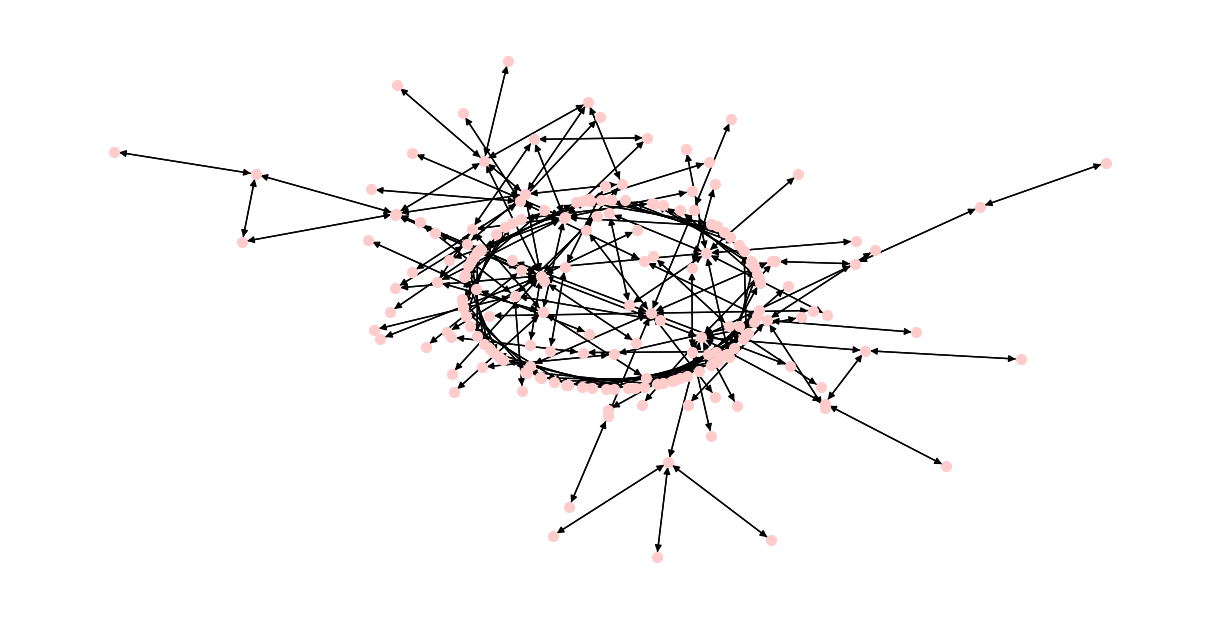

In [9]:
AGx=ArbGraph.from_cc(CCx)
AGx.plot(labels=False, node_size=50, node_color="#fcc")._

### Biggest crosses (HEX, UNI, ICHI, FRAX)

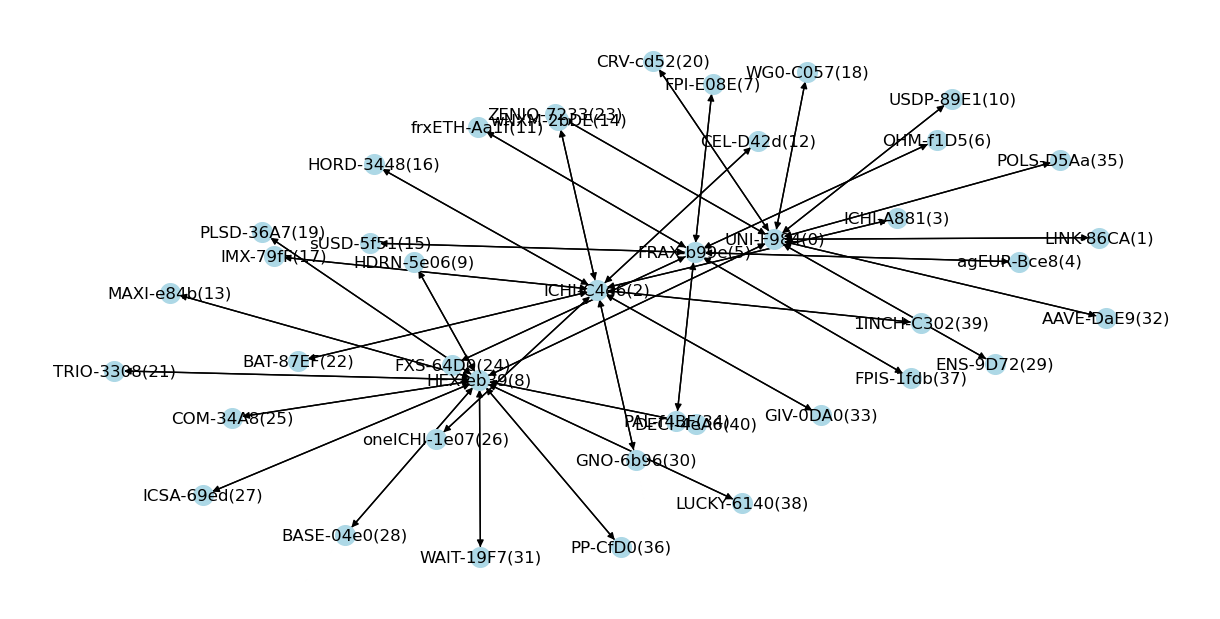

45

In [10]:
CCx2 = CCx.bypairs(
    CCx.filter_pairs(onein=f"{T.HEX}, {T.UNI}, {T.ICHI}, {T.FRAX}")
)
ArbGraph.from_cc(CCx2).plot()
len(CCx2)

### Carbon

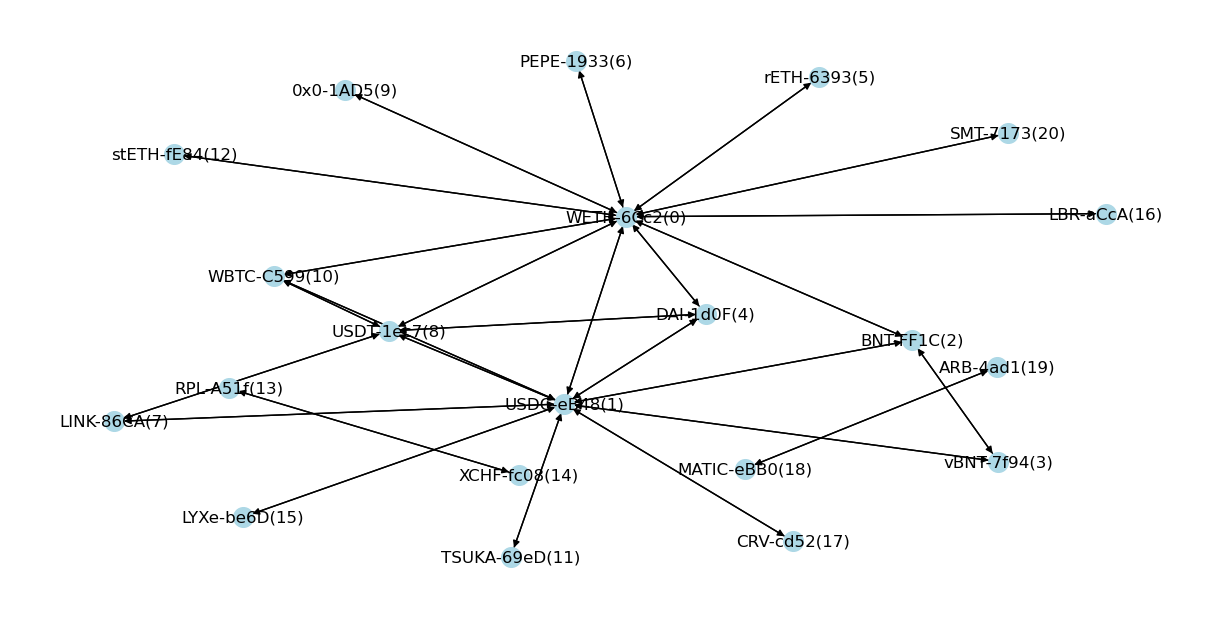

In [11]:
ArbGraph.from_cc(CCc1).plot()._

In [12]:
len(CCc1), len(CCc1.tokens())

(70, 21)

In [13]:
CCc1.token_count()

[('WETH-6Cc2', 38),
 ('USDC-eB48', 31),
 ('BNT-FF1C', 20),
 ('vBNT-7f94', 10),
 ('USDT-1ec7', 10),
 ('DAI-1d0F', 5),
 ('WBTC-C599', 4),
 ('LINK-86CA', 3),
 ('PEPE-1933', 2),
 ('0x0-1AD5', 2),
 ('stETH-fE84', 2),
 ('CRV-cd52', 2),
 ('MATIC-eBB0', 2),
 ('ARB-4ad1', 2),
 ('rETH-6393', 1),
 ('TSUKA-69eD', 1),
 ('RPL-A51f', 1),
 ('XCHF-fc08', 1),
 ('LYXe-be6D', 1),
 ('LBR-aCcA', 1),
 ('SMT-7173', 1)]

In [14]:
len(CCc1.pairs()), CCc1.pairs()

(26,
 {'0x0-1AD5/WETH-6Cc2',
  'ARB-4ad1/MATIC-eBB0',
  'BNT-FF1C/USDC-eB48',
  'CRV-cd52/USDC-eB48',
  'DAI-1d0F/USDC-eB48',
  'DAI-1d0F/USDT-1ec7',
  'LBR-aCcA/WETH-6Cc2',
  'LINK-86CA/USDC-eB48',
  'LINK-86CA/USDT-1ec7',
  'LYXe-be6D/USDC-eB48',
  'PEPE-1933/WETH-6Cc2',
  'RPL-A51f/XCHF-fc08',
  'SMT-7173/WETH-6Cc2',
  'TSUKA-69eD/USDC-eB48',
  'USDT-1ec7/USDC-eB48',
  'WBTC-C599/USDC-eB48',
  'WBTC-C599/USDT-1ec7',
  'WBTC-C599/WETH-6Cc2',
  'WETH-6Cc2/BNT-FF1C',
  'WETH-6Cc2/DAI-1d0F',
  'WETH-6Cc2/USDC-eB48',
  'WETH-6Cc2/USDT-1ec7',
  'rETH-6393/WETH-6Cc2',
  'stETH-fE84/WETH-6Cc2',
  'vBNT-7f94/BNT-FF1C',
  'vBNT-7f94/USDC-eB48'})

### Token subsets

In [15]:
O = MargPOptimizer(CCm.bypairs(
    CCm.filter_pairs(bothin=f"{T.ETH},{T.USDC},{T.USDT},{T.BNT},{T.DAI},{T.WBTC}")
))
r = O.margp_optimizer(f"{T.USDC}", params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR).fillna("")

,USDT-1ec7,USDC-eB48,DAI-1d0F,WETH-6Cc2,WBTC-C599,BNT-FF1C
357,1214.455968,-1216.41934,,,,
594,,,943.826762,-0.512606,,
183,-48.863906,,,,0.00175,
624,,,-10733.806571,,,24578.315452
656,,,,,-0.870495,55566.320623
...,...,...,...,...,...,...
21f3ea686abd44c6b7829e488a01aa74,,6780944.55249,-6780334.136658,,,
PRICE,1.00058,1.0,1.000179,1842.67228,27604.143472,0.429078
AMMIn,2905472.583409,9856630.397465,6845674.127441,331.431642,7.424195,192904.817736
AMMOut,-2905472.583409,-9861236.407656,-6845674.127441,-331.431642,-7.424195,-192904.81774


In [16]:
#r.trade_instructions(ti_format=O.TIF_DFAGGR).fillna("").to_excel("ti.xlsx")

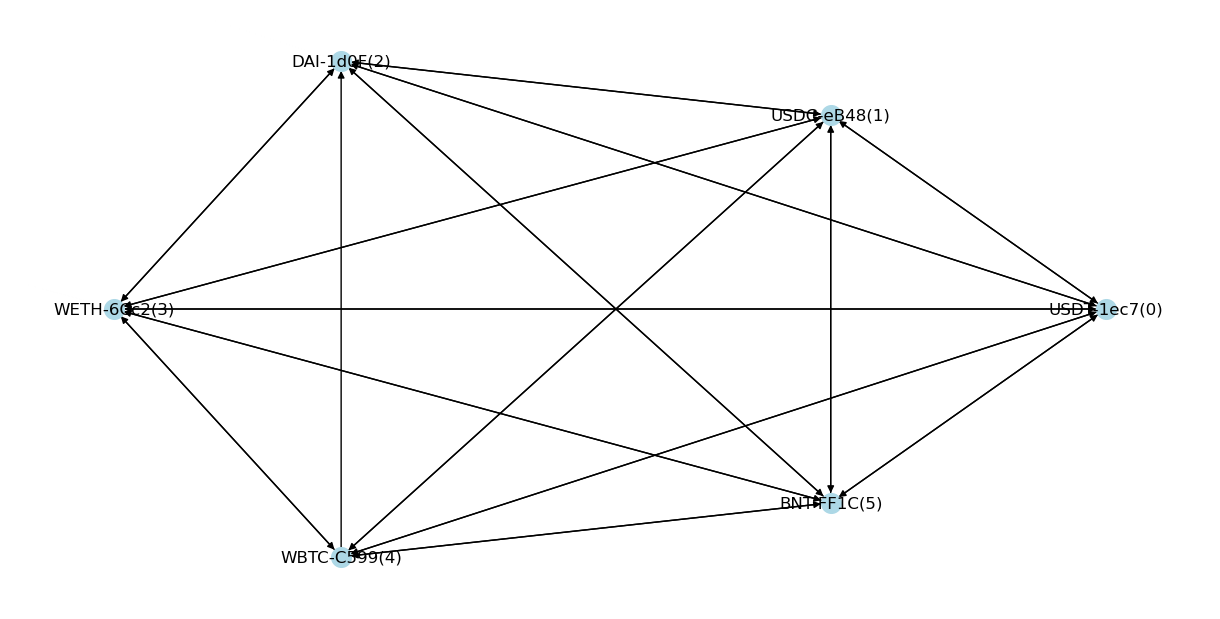

In [17]:
ArbGraph.from_r(r).plot()._

In [18]:
#O.CC.plot()

## ABC Tests

In [19]:
assert raises(OptimizerBase).startswith("Can't instantiate abstract class")
assert raises(OptimizerBase.OptimizerResult).startswith("Can't instantiate abstract class")

In [20]:
assert raises(CPCArbOptimizer).startswith("Can't instantiate abstract class")
assert raises(CPCArbOptimizer.OptimizerResult).startswith("Can't instantiate abstract class")

In [21]:
assert not raises(MargPOptimizer, CCm)
assert not raises(PairOptimizer, CCm)
assert not raises(ConvexOptimizer, CCm)

In [22]:
assert MargPOptimizer(CCm).kind == "margp"
assert PairOptimizer(CCm).kind == "pair"
assert ConvexOptimizer(CCm).kind == "convex"

In [23]:
CPCArbOptimizer.MargpOptimizerResult(None, time=0,errormsg="err", optimizer=None)

CPCArbOptimizer.MargpOptimizerResult(result=None, time=0, method='margp', targettkn=None, p_optimal_t=None, dtokens_t=None, tokens_t=None, errormsg='err')

## General and Specific Tests

In [24]:
CA = CAm

### General tests

#### General data integrity (should ALWAYS hold)

In [25]:
assert len(pairs0) > 2500
assert len(pairs) > 2500
assert len(pairs0) > len(pairs)
assert len(pairsc) > 10
assert len(CCm.tokens()) > 2000
assert len(CCm)>4000
assert len(CCm.filter_pairs(onein=f"{T.ETH}")) > 1900 # ETH pairs
assert len(CCm.filter_pairs(onein=f"{T.USDC}")) > 300 # USDC pairs
assert len(CCm.filter_pairs(onein=f"{T.USDT}")) > 190 # USDT pairs
assert len(CCm.filter_pairs(onein=f"{T.DAI}")) > 50 # DAI pairs
assert len(CCm.filter_pairs(onein=f"{T.WBTC}")) > 30 # WBTC pairs

In [26]:
xis0 = {c.cid: (c.x, c.y) for c in CCm if c.x==0}
yis0 = {c.cid: (c.x, c.y) for c in CCm if c.y==0}
assert len(xis0) == 0 # set loglevel debug to see removal of curves
assert len(yis0) == 0

#### Data integrity

In [27]:
assert len(CCm) == 4155
assert len(CCu3) == 1411
assert len(CCu2) == 2177
assert len(CCs2) == 236
assert len(CCm.tokens()) == 2233
assert len(CCm.pairs()) == 2834
assert len(CCm.pairs(standardize=False)) == 2864

In [28]:
assert CA.pairs()  == CCm.pairs(standardize=True)
assert CA.pairsc() == {c.pairo.primary for c in CCm if c.P("exchange")=="carbon_v1"}
assert CA.tokens() == CCm.tokens()

#### prices

In [29]:
r1 = CCc1.prices(result=CCc1.PR_TUPLE)
r2 = CCc1.prices(result=CCc1.PR_TUPLE, primary=False)
r3 = CCc1.prices(result=CCc1.PR_TUPLE, primary=False, inclpair=False)
assert isinstance(r1, tuple)
assert isinstance(r2, tuple)
assert isinstance(r3, tuple)
assert len(r1) == len(r2)
assert len(r1) == len(r3)
assert len(r1[0]) == 3
assert isinstance(r1[0][0], str)
assert isinstance(r1[0][1], float)
assert len(r1[0][2].split("/"))==2

In [30]:
r2[:2]

(('1701411834604692317316873037158841057334-0',
  1700.000169864341,
  'WETH-6Cc2/USDC-eB48'),
 ('1701411834604692317316873037158841057334-1',
  0.0005000000499999988,
  'USDC-eB48/WETH-6Cc2'))

In [31]:
r3[:2]

(1700.000169864341, 0.0005000000499999988)

In [32]:
r1a = CCc1.prices(result=CCc1.PR_DICT)
r2a = CCc1.prices(result=CCc1.PR_DICT, primary=False)
r3a = CCc1.prices(result=CCc1.PR_DICT, primary=False, inclpair=False)
assert isinstance(r1a, dict)
assert isinstance(r2a, dict)
assert isinstance(r3a, dict)
assert len(r1a) == len(r1)
assert len(r1a) == len(r2a)
assert len(r1a) == len(r3a)
assert list(r1a.keys()) == list(x[0] for x in r1)
assert r1a.keys() == r2a.keys()
assert r1a.keys() == r3a.keys()
assert set(len(x) for x in r1a.values()) == {2},  "all records must be of of length 2"
assert set(type(x[0]) for x in r1a.values()) == {float},  "all records must have first type float"
assert set(type(x[1]) for x in r1a.values()) == {str},  "all records must have second type str"
assert tuple(r3a.values()) == r3

In [33]:
df =  CCc1.prices(result=CCc1.PR_DF, primary=False)
assert len(df) == len(r1)
assert tuple(df.index) == tuple(x[0] for x in r1)
assert tuple(df["price"]) == r3
df

,price,pair
cid,,
1701411834604692317316873037158841057334-0,1700.000170,WETH-6Cc2/USDC-eB48
1701411834604692317316873037158841057334-1,0.000500,USDC-eB48/WETH-6Cc2
4423670769972200025023869896612986748966-1,1.000000,BNT-FF1C/vBNT-7f94
1701411834604692317316873037158841057343-1,0.000503,USDC-eB48/WETH-6Cc2
1361129467683753853853498429727072845828-0,0.999000,USDC-eB48/DAI-1d0F
...,...,...
9527906273786276976974489008089509920820-1,0.000034,USDT-1ec7/WBTC-C599
6125082604576892342340742933771827806240-0,0.663550,MATIC-eBB0/ARB-4ad1
6125082604576892342340742933771827806240-1,1.428571,ARB-4ad1/MATIC-eBB0


#### more prices

In [34]:
CCt = CCm.bypairs(f"{T.USDC}/{T.ETH}")

In [35]:
r = CCt.prices(result=CCt.PR_TUPLE)
assert isinstance(r, tuple)
assert len(r) == len(CCt)
assert r[0] == ('6c988ffdc9e74acd97ccfb16dd65c110', 1833.9007005259564, 'WETH-6Cc2/USDC-eB48')
assert CCt.prices() == CCt.prices(result=CCt.PR_DICT)
r = CCt.prices(result=CCt.PR_DICT)
assert len(r) == len(CCt)
assert isinstance(r, dict)
assert r['6c988ffdc9e74acd97ccfb16dd65c110'] == (1833.9007005259564, 'WETH-6Cc2/USDC-eB48')
df = CCt.prices(result=CCt.PR_DF)
assert len(df) == len(CCt)
assert tuple(df.loc["1701411834604692317316873037158841057339-0"]) == (1799.9999997028303, 'WETH-6Cc2/USDC-eB48')

#### price_ranges

In [36]:
CCt = CCm.bypairs(f"{T.USDC}/{T.ETH}")
CAt = CPCAnalyzer(CCt)

In [37]:
r = CAt.price_ranges(result=CAt.PR_TUPLE)
assert len(r) == len(CCt)
assert r[0] == (
    'WETH/USDC',        # pair
    '16dd65c110',       # cid
    'sushiswap_v2',     # exchange
    'b',                # buy
    's',                # sell
    0,                  # min_primary
    None,               # max_primary
    1833.9007005259564  # pp
)
assert r[1] == (
    'WETH/USDC',
    '41057334-0',
    'carbon_v1',
    'b',
    '',
    1699.999829864358,
    1700.000169864341,
    1700.000169864341
)
r = CAt.price_ranges(result=CAt.PR_TUPLE, short=False)
assert r[0] == (
    'WETH-6Cc2/USDC-eB48',
    '6c988ffdc9e74acd97ccfb16dd65c110',
    'sushiswap_v2',
    'b',
    's',
    0,
    None,
    1833.9007005259564
)
r = CAt.price_ranges(result=CAt.PR_DICT)
assert len(r) == len(CCt)
assert r['6c988ffdc9e74acd97ccfb16dd65c110'] == (
    'WETH/USDC',
    '16dd65c110',
    'sushiswap_v2',
    'b',
    's',
    0,
    None,
    1833.9007005259564
)
df = CAt.price_ranges(result=CAt.PR_DF)
assert len(df) == len(CCt)
assert tuple(df.index.names) == ('pair', 'exch', 'cid')
assert tuple(df.columns) == ('b', 's', 'p_min', 'p_max', 'p_marg')
assert set(df["p_marg"]) == set(x[-1] for x in CAt.price_ranges(result=CCt.PR_TUPLE))
for p1, p2 in zip(df["p_marg"], df["p_marg"][1:]):
    assert p2 >= p1
df

b  s        p_min        p_max       p_marg
pair      exch         cid                                                    
WETH/USDC carbon_v1    41057306-0  b     1404.999859  1405.000140  1405.000140
                       41057334-0  b     1699.999830  1700.000170  1700.000170
                       41057331-0  b     1700.000000  1800.000000  1800.000000
                       41057339-0  b     1700.000000  1800.000000  1800.000000
          uniswap_v3   593         b  s  1829.919121  1866.884073  1832.243200
          sushiswap_v2 16dd65c110  b  s     0.000000          NaN  1833.900701
                       803         b  s     0.000000          NaN  1838.745520
          uniswap_v2   c60c551073  b  s     0.000000          NaN  1840.159506
                       255         b  s          NaN          NaN  1840.773969
          uniswap_v3   a176b13aa0  b  s  1833.582439  1844.616450  1841.729378
                       7708cee9b5  b  s  1829.919121  1866.884073  1843.002859
                       346         b  s  1846.461897  1848.309190  1848.191535
          carbon_v1    41057337-0  b     1600.000000  1850.000000  1850.000000
                       41057292-0  b     1850.000000  1853.408818  1853.408818
                       41057353-0  b     1853.999814  1854.000185  1854.000185
                       41057296-0  b     1929.999807  1929.999807  1929.999807
                       41057299-1     s  1940.000000  2000.000000  1940.000000
                       41057296-1     s  1949.999805  1950.000195  1949.999805
                       41057343-1     s  1989.999801  1990.000199  1989.999801
                       41057334-1     s  1999.999800  2000.000200  1999.999800
                       41057292-1     s  2000.000000  2050.000000  2000.000000
                       41057353-1     s  2047.999795  2048.000205  2047.999795
                       41057285-1     s  2099.999790  2100.000210  2099.999790
                       41057315-1     s  2300.000000  2400.000000  2300.000000

#### count_by_pairs

In [38]:
assert len(CA.count_by_pairs()) == len(CA.pairs())
assert sum(CA.count_by_pairs()["count"])==len(CA.CC)
assert np.all(CA.count_by_pairs() == CA.count_by_pairs(asdf=True))
assert len(CA.count_by_pairs()) == len(CA.count_by_pairs(asdf=False))
assert type(CA.count_by_pairs()).__name__ == "DataFrame"
assert type(CA.count_by_pairs(asdf=False)).__name__ == "list"
assert type(CA.count_by_pairs(asdf=False)[0]).__name__ == "tuple"
for i in range(10):
    assert len(CA.count_by_pairs(minn=i)) >= len(CA.count_by_pairs(minn=i)), f"failed {i}"

#### count_by_tokens

In [39]:
r = CA.count_by_tokens()
assert len(r) == len(CA.tokens())
assert sum(r["total"]) == 2*len(CA.CC)
assert tuple(r["total"]) == tuple(x[1] for x in CA.CC.token_count())
for ix, row in r[:10].iterrows():
    assert row[0] >= sum(row[1:]), f"failed at {ix} {tuple(row)}"
CA.count_by_tokens()

,total,carb,uni3,uni2,sushi
token,,,,,
WETH-6Cc2,2487,38,764,1571,111
USDC-eB48,694,31,334,263,63
USDT-1ec7,414,10,162,211,28
BNT-FF1C,283,20,0,2,0
DAI-1d0F,142,5,44,54,36
...,...,...,...,...,...
JBX-6f66,1,0,1,0,0
anonUSD-1eFd,1,0,1,0,0
AGOV-280c,1,0,1,0,0


#### pool_arbitrage_statistics

In [40]:
pas = CAm.pool_arbitrage_statistics()
assert np.all(pas == CAm.pool_arbitrage_statistics(CAm.POS_DF))
assert len(pas)==165
assert list(pas.columns) == ['price', 'vl', 'itm', 'b', 's', 'bsv']
assert list(pas.index.names) == ['pair', 'exchange', 'cid0']
assert {x[0] for x in pas.index} == {Pair.n(x) for x in CAm.pairsc()}
assert {x[1] for x in pas.index} == {'bancor_v2', 'bancor_v3','carbon_v1','sushiswap_v2','uniswap_v2','uniswap_v3'}
pas

price            vl itm  b  s  \
pair      exchange   cid0                                         
0x0/WETH  carbon_v1  132277-0  0.000013  1.342084e+04      b      
                     132277-1  0.000015  3.597323e+02   x     s   
          uniswap_v2 551118da  0.000033  2.602200e+07   x  b  s   
ARB/MATIC carbon_v1  806240-1  1.428571  1.418060e+02      b      
                     806240-0  1.507045  1.276054e+01         s   
...                                 ...           ...  .. .. ..   
vBNT/BNT  carbon_v1  748966-1  1.000000  1.089256e+03         s   
                     748990-1  1.050000  1.122591e+03         s   
                     748950-0  1.063830  1.329046e+04         s   
                     748965-1  1.100000  1.027046e+03         s   
vBNT/USDC carbon_v1  171896-1  0.390000  5.000000e+03         s   

                                                            bsv  
pair      exchange   cid0                                        
0x0/WETH  carbon_v1  132277-0       buy-0x0 @ 0.00 WETH per 0x0  
                     132277-1      sell-0x0 @ 0.00 WETH per 0x0  
          uniswap_v2 551118da  buy-sell-0x0 @ 0.00 WETH per 0x0  
ARB/MATIC carbon_v1  806240-1      buy-ARB @ 1.43 MATIC per ARB  
                     806240-0     sell-ARB @ 1.51 MATIC per ARB  
...                                                         ...  
vBNT/BNT  carbon_v1  748966-1     sell-vBNT @ 1.00 BNT per vBNT  
                     748990-1     sell-vBNT @ 1.05 BNT per vBNT  
                     748950-0     sell-vBNT @ 1.06 BNT per vBNT  
                     748965-1     sell-vBNT @ 1.10 BNT per vBNT  
vBNT/USDC carbon_v1  171896-1    sell-vBNT @ 0.39 USDC per vBNT  

[165 rows x 6 columns]

In [41]:
pasd = CAm.pool_arbitrage_statistics(CAm.POS_DICT)
assert isinstance(pasd, dict)
assert len(pasd) == 26
assert len(pasd['WETH-6Cc2/DAI-1d0F']) == 7
pd0 = pasd['WETH-6Cc2/DAI-1d0F'][0]
assert pd0[:2] == ('WETH/DAI', 'WETH-6Cc2/DAI-1d0F')
assert iseq(pd0[2], 1840.1216491367131)
assert pd0[3:6] == ('594', '594', 'uniswap_v3')
assert iseq(pd0[6], 8.466598820198278)
assert pd0[7:] == ('', 'b', 's', 'buy-sell-WETH @ 1840.12 DAI per WETH')
pd0

('WETH/DAI',
 'WETH-6Cc2/DAI-1d0F',
 1840.1216491367131,
 '594',
 '594',
 'uniswap_v3',
 8.466598820198278,
 '',
 'b',
 's',
 'buy-sell-WETH @ 1840.12 DAI per WETH')

In [42]:
pasl = CAm.pool_arbitrage_statistics(result = CAm.POS_LIST)
assert isinstance(pasl, tuple)
assert len(pasl) == len(pas)
pd0 = [(ix, x) for ix, x in enumerate(pasl) if x[2]==1840.1216491367131]
pd0 = pasl[pd0[0][0]]
assert pd0[:2] == ('WETH/DAI', 'WETH-6Cc2/DAI-1d0F')
assert iseq(pd0[2], 1840.1216491367131)
assert pd0[3:6] == ('594', '594', 'uniswap_v3')
assert iseq(pd0[6], 8.466598820198278)
assert pd0[7:] == ('', 'b', 's', 'buy-sell-WETH @ 1840.12 DAI per WETH')
pd0

('WETH/DAI',
 'WETH-6Cc2/DAI-1d0F',
 1840.1216491367131,
 '594',
 '594',
 'uniswap_v3',
 8.466598820198278,
 '',
 'b',
 's',
 'buy-sell-WETH @ 1840.12 DAI per WETH')

### MargP Optimizer

#### margp optimizer

In [43]:
tokenlist = f"{T.ETH},{T.USDC},{T.USDT},{T.BNT},{T.DAI},{T.WBTC}"
targettkn = f"{T.USDC}"
O = MargPOptimizer(CCm.bypairs(CCm.filter_pairs(bothin=tokenlist)))
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR).fillna("")

,USDT-1ec7,USDC-eB48,DAI-1d0F,WETH-6Cc2,WBTC-C599,BNT-FF1C
357,1214.455968,-1216.41934,,,,
594,,,943.826762,-0.512606,,
183,-48.863906,,,,0.00175,
624,,,-10733.806571,,,24578.315452
656,,,,,-0.870495,55566.320623
...,...,...,...,...,...,...
21f3ea686abd44c6b7829e488a01aa74,,6780944.55249,-6780334.136658,,,
PRICE,1.00058,1.0,1.000179,1842.67228,27604.143472,0.429078
AMMIn,2905472.583409,9856630.397465,6845674.127441,331.431642,7.424195,192904.817736
AMMOut,-2905472.583409,-9861236.407656,-6845674.127441,-331.431642,-7.424195,-192904.81774


#### MargpOptimizerResult

In [44]:
assert type(r) == MargPOptimizer.MargpOptimizerResult
assert iseq(r.result, -4606.010157294979)
# assert r.time > 0.001
# assert r.time < 0.1
assert r.method == O.METHOD_MARGP
assert r.targettkn == targettkn
assert set(r.tokens_t)==set(['USDT-1ec7', 'WETH-6Cc2', 'WBTC-C599', 'DAI-1d0F', 'BNT-FF1C'])
p_opt_d0 = {t:x for x, t in zip(r.p_optimal_t, r.tokens_t)}
p_opt_d = {t:round(x,6) for x, t in zip(r.p_optimal_t, r.tokens_t)}
print("optimal p", p_opt_d)
assert p_opt_d == {'WETH-6Cc2': 1842.67228, 'WBTC-C599': 27604.143472, 
                'BNT-FF1C': 0.429078, 'USDT-1ec7': 1.00058, 'DAI-1d0F': 1.000179}
assert r.p_optimal[r.targettkn] == 1
po = [(k,v) for k,v in r.p_optimal.items()][:-1]
assert len(po)==len(r.p_optimal_t)
for k,v in po:
    assert p_opt_d0[k] == v, f"error at {k}, {v}, {p_opt_d0[k]}"

optimal p {'USDT-1ec7': 1.00058, 'WETH-6Cc2': 1842.67228, 'WBTC-C599': 27604.143472, 'BNT-FF1C': 0.429078, 'DAI-1d0F': 1.000179}


#### TradeInstructions

In [45]:
assert r.trade_instructions() == r.trade_instructions(ti_format=O.TIF_OBJECTS)
ti = r.trade_instructions(ti_format=O.TIF_OBJECTS)
cids = tuple(ti_.cid for ti_ in ti)
assert isinstance(ti, tuple)
assert len(ti) == 86
ti0=[x for x in ti if x.cid=="357"]
assert len(ti0)==1
ti0=ti0[0]
assert ti0.cid == ti0.curve.cid
assert type(ti0).__name__ == "TradeInstruction"
assert type(ti[0]) == MargPOptimizer.TradeInstruction
assert ti0.tknin == f"{T.USDT}"
assert ti0.tknout == f"{T.USDC}"
assert round(ti0.amtin, 8)  == 1214.45596849
assert round(ti0.amtout, 8) == -1216.41933959
if not ti0.error is None:
    print(ti0)
    print(ti0.error)
assert ti0.error is None
ti[:2]

(CPCArbOptimizer.TradeInstruction(cid='357', tknin='USDT-1ec7', amtin=1214.4559684880078, tknout='USDC-eB48', amtout=-1216.4193395883776, error=None),
 CPCArbOptimizer.TradeInstruction(cid='594', tknin='DAI-1d0F', amtin=943.8267624522559, tknout='WETH-6Cc2', amtout=-0.5126061548006646, error=None))

In [46]:
tid = r.trade_instructions(ti_format=O.TIF_DICTS)
assert isinstance(tid, tuple)
assert len(tid) == len(ti)
tid0=[x for x in tid if x["cid"]=="357"]
assert len(tid0)==1
tid0=tid0[0]
assert type(tid0)==dict
assert tid0["tknin"] == f"{T.USDT}"
assert tid0["tknout"] == f"{T.USDC}"
assert round(tid0["amtin"], 8)  == 1214.45596849
assert round(tid0["amtout"], 8) == -1216.41933959
assert tid0["error"] is None
tid[:2]

({'cid': '357',
  'tknin': 'USDT-1ec7',
  'amtin': 1214.4559684880078,
  'tknout': 'USDC-eB48',
  'amtout': -1216.4193395883776,
  'error': None},
 {'cid': '594',
  'tknin': 'DAI-1d0F',
  'amtin': 943.8267624522559,
  'tknout': 'WETH-6Cc2',
  'amtout': -0.5126061548006646,
  'error': None})

In [47]:
df = r.trade_instructions(ti_format=O.TIF_DF).fillna("")
assert tuple(df.index) == cids
assert np.all(r.trade_instructions(ti_format=O.TIF_DFRAW).fillna("")==df)
assert len(df) == len(ti)
assert list(df.columns)[:4] == ['pair', 'pairp', 'tknin', 'tknout']
assert len(df.columns) == 4 + len(r.tokens_t) + 1
tif0 = dict(df.loc["357"])
assert tif0["pair"] == "USDC-eB48/USDT-1ec7"
assert tif0["pairp"] == "USDC/USDT"
assert tif0["tknin"] == tid0["tknin"]
assert tif0[tif0["tknin"]] == tid0["amtin"]
assert tif0[tif0["tknout"]] == tid0["amtout"]
df[:2]

,pair,pairp,tknin,tknout,USDT-1ec7,USDC-eB48,DAI-1d0F,WETH-6Cc2,WBTC-C599,BNT-FF1C
cid,,,,,,,,,,
357,USDC-eB48/USDT-1ec7,USDC/USDT,USDT-1ec7,USDC-eB48,1214.455968,-1216.41934,,,,
594,DAI-1d0F/WETH-6Cc2,DAI/WETH,DAI-1d0F,WETH-6Cc2,,,943.826762,-0.512606,,


In [48]:
dfa = r.trade_instructions(ti_format=O.TIF_DFAGGR).fillna("")
assert tuple(dfa.index)[:-4] == cids
assert len(dfa) == len(df)+4
assert len(dfa.columns) == len(r.tokens_t) + 1
assert set(dfa.columns) == set(r.tokens_t).union(set([r.targettkn]))
assert list(dfa.index)[-4:] == ['PRICE', 'AMMIn', 'AMMOut', 'TOTAL NET']
dfa[:10]

,USDT-1ec7,USDC-eB48,DAI-1d0F,WETH-6Cc2,WBTC-C599,BNT-FF1C
357,1214.455968,-1216.41934,,,,
594,,,943.826762,-0.512606,,
183,-48.863906,,,,0.00175,
624,,,-10733.806571,,,24578.315452
656,,,,,-0.870495,55566.320623
795,0.514254,,-0.51586,,,
840,11870.146436,,,-6.453271,,
256,2519.448144,,,-1.368187,,
839,,27.245732,-27.298765,,,
290,,,,-0.321776,,1364.584132


In [49]:
dfpg = r.trade_instructions(ti_format=O.TIF_DFPG)
assert set(x[1] for x in dfpg.index) == set(cids)
assert np.all(dfpg["gain_tknq"]>=0)
assert np.all(dfpg["gain_r"]>=0)
assert round(np.max(dfpg["gain_r"]),8) == 0.04739068
assert round(np.min(dfpg["gain_r"]),8) == 1.772e-05
assert len(dfpg) == len(ti)
for p, t in zip(tuple(dfpg["pair"]), tuple(dfpg["tknq"])):
    assert p.split("/")[1] == t, f"error in {p} [{t}]"
print(f"total gains: {sum(dfpg['gain_ttkn']):,.2f} {r.targettkn} [result={-r.result:,.2f}]")
assert abs(sum(dfpg["gain_ttkn"])/r.result+1)<0.01
dfpg[:10]

total gains: 4,611.73 USDC-eB48 [result=4,606.01]


fee                 pair  \
exch       cid                                                             
uniswap_v3 346                               0.0005  USDC-eB48/WETH-6Cc2   
           7af1ca9ab5eb4b5f98105df03880de01  0.0005   DAI-1d0F/USDC-eB48   
           21f3ea686abd44c6b7829e488a01aa74  0.0001   DAI-1d0F/USDC-eB48   
           c9a1ba7537f242ecacf31755b7be04bd  0.0005  USDC-eB48/USDT-1ec7   
           593                               0.0100  USDC-eB48/WETH-6Cc2   
           67f9d1e2b3fc407eb44dcb637d051d19  0.0005  WETH-6Cc2/USDT-1ec7   
           edb7550782154a5b8eb1e4feedc87668  0.0005  WBTC-C599/WETH-6Cc2   
           486                               0.0001  USDC-eB48/USDT-1ec7   
           4c50c9e4fdde4aefbf495b30d42fa3d0  0.0001  USDC-eB48/USDT-1ec7   
           a6595d66f70c432a9b68557428a6fe54  0.0005   DAI-1d0F/WETH-6Cc2   

                                                 amt_tknq       tknq  \
exch       cid                                                         
uniswap_v3 346                               2.191376e+02  WETH-6Cc2   
           7af1ca9ab5eb4b5f98105df03880de01 -6.733839e+06  USDC-eB48   
           21f3ea686abd44c6b7829e488a01aa74  6.780945e+06  USDC-eB48   
           c9a1ba7537f242ecacf31755b7be04bd  1.414570e+06  USDT-1ec7   
           593                              -1.652532e+01  WETH-6Cc2   
           67f9d1e2b3fc407eb44dcb637d051d19  2.979293e+04  USDT-1ec7   
           edb7550782154a5b8eb1e4feedc87668 -9.827301e+01  WETH-6Cc2   
           486                               1.286263e+06  USDT-1ec7   
           4c50c9e4fdde4aefbf495b30d42fa3d0 -2.810367e+06  USDT-1ec7   
           a6595d66f70c432a9b68557428a6fe54 -6.599276e+00  WETH-6Cc2   

                                                  margp0         effp  \
exch       cid                                                          
uniswap_v3 346                                  0.000541     0.000541   
           7af1ca9ab5eb4b5f98105df03880de01     1.000396     1.000287   
           21f3ea686abd44c6b7829e488a01aa74     1.000077     1.000090   
           c9a1ba7537f242ecacf31755b7be04bd     0.999223     0.999322   
           593                                  0.000546     0.000544   
           67f9d1e2b3fc407eb44dcb637d051d19  1836.656194  1836.954617   
           edb7550782154a5b8eb1e4feedc87668    14.989332    14.985763   
           486                                  0.999346     0.999373   
           4c50c9e4fdde4aefbf495b30d42fa3d0     0.999456     0.999438   
           a6595d66f70c432a9b68557428a6fe54     0.000544     0.000544   

                                                   margp    gain_r  \
exch       cid                                                       
uniswap_v3 346                                  0.000543  0.002519   
           7af1ca9ab5eb4b5f98105df03880de01     1.000179  0.000108   
           21f3ea686abd44c6b7829e488a01aa74     1.000179  0.000089   
           c9a1ba7537f242ecacf31755b7be04bd     0.999420  0.000099   
           593                                  0.000543  0.002842   
           67f9d1e2b3fc407eb44dcb637d051d19  1841.603847  0.002525   
           edb7550782154a5b8eb1e4feedc87668    14.980495  0.000352   
           486                                  0.999420  0.000047   
           4c50c9e4fdde4aefbf495b30d42fa3d0     0.999420  0.000018   
           a6595d66f70c432a9b68557428a6fe54     0.000543  0.002563   

                                              gain_tknq    gain_ttkn  
exch       cid                                                        
uniswap_v3 346                                 0.552105  1017.347899  
           7af1ca9ab5eb4b5f98105df03880de01  729.223514   729.223514  
           21f3ea686abd44c6b7829e488a01aa74  602.634094   602.634094  
           c9a1ba7537f242ecacf31755b7be04bd  139.426383   139.507273  
           593                                 0.046964    86.539463  
           67f9d1e2b3fc407eb44dcb637d051d19   75.213875

### Convex Optimizer

**THE CONVEX OPTIMIZER IS DEPRECATED AND NO LONGER IN USE IN PRODUCTION**

**THIS SECTION DOES SEEM TO THROW RANDOM ERRORS AND IS THEREFORE DISABLED**

In [50]:
# tokens = f"{T.DAI},{T.USDT},{T.HEX},{T.WETH},{T.LINK}"
# CCo  = CCu2.bypairs(CCu2.filter_pairs(bothin=tokens))
# CCo += CCs2.bypairs(CCu2.filter_pairs(bothin=tokens))
# CA   = CPCAnalyzer(CCo)
# O = ConvexOptimizer(CCo)
# #ArbGraph.from_cc(CCo).plot()._

In [51]:
# CA.count_by_tokens()

In [52]:
#CCo.plot()

#### convex optimizer

In [53]:
# targettkn = T.USDT
# # r = O.margp_optimizer(targettkn, params=dict(verbose=True, debug=False))
# # r

In [54]:
# SFC = O.SFC(**{targettkn:O.AMMPays})
# r = O.convex_optimizer(SFC, verbose=False, solver=O.SOLVER_SCS)
# r

#### NofeesOptimizerResult

In [55]:
# round(r.result,-5)

In [56]:
# assert type(r) == ConvexOptimizer.NofeesOptimizerResult
# # assert round(r.result,-5) <= -1500000.0
# # assert round(r.result,-5) >= -2500000.0
# # assert r.time < 8
# assert r.method == "convex"
# assert set(r.token_table.keys()) == set(['USDT-1ec7', 'WETH-6Cc2', 'LINK-86CA', 'DAI-1d0F', 'HEX-eb39'])
# assert len(r.token_table[T.USDT].x)==0
# assert len(r.token_table[T.USDT].y)==10
# lx = list(it.chain(*[rr.x for rr in r.token_table.values()]))
# lx.sort()
# ly = list(it.chain(*[rr.y for rr in r.token_table.values()]))
# ly.sort()
# assert lx == [_ for _ in range(21)]
# assert ly == lx

#### trade instructions

In [57]:
# ti = r.trade_instructions()
# assert type(ti[0]) == ConvexOptimizer.TradeInstruction

In [58]:
# assert r.trade_instructions() == r.trade_instructions(ti_format=O.TIF_OBJECTS)
# ti = r.trade_instructions(ti_format=O.TIF_OBJECTS)
# cids = tuple(ti_.cid for ti_ in ti)
# assert isinstance(ti, tuple)
# assert len(ti) == 21
# ti0=[x for x in ti if x.cid=="175"]
# assert len(ti0)==1
# ti0=ti0[0]
# assert ti0.cid == ti0.curve.cid
# assert type(ti0).__name__ == "TradeInstruction"
# assert type(ti[0]) == ConvexOptimizer.TradeInstruction
# assert ti0.tknin == f"{T.LINK}"
# assert ti0.tknout == f"{T.DAI}"
# # assert round(ti0.amtin, 8)  == 8.50052943
# # assert round(ti0.amtout, 8) == -50.40963779
# if not ti0.error is None:
#     print(ti0)
#     print(ti0.error)
# assert ti0.error is None
# print(r.error, ti0.error)
# ti[:2],  ti0, r

In [59]:
# tid = r.trade_instructions(ti_format=O.TIF_DICTS)
# assert isinstance(tid, tuple)
# assert type(tid[0])==dict
# assert len(tid) == len(ti)
# tid0=[x for x in tid if x["cid"]=="175"]
# assert len(tid0)==1
# tid0=tid0[0]
# assert tid0["tknin"] == f"{T.LINK}"
# assert tid0["tknout"] == f"{T.DAI}"
# # assert round(tid0["amtin"], 8)  == 8.50052943
# # assert round(tid0["amtout"], 8) == -50.40963779
# assert tid0["error"] is None
# tid[:2]

In [60]:
# df = r.trade_instructions(ti_format=O.TIF_DF).fillna("")
# assert tuple(df.index) == cids
# assert np.all(r.trade_instructions(ti_format=O.TIF_DFRAW).fillna("")==df)
# assert len(df) == len(ti)
# assert list(df.columns)[:4] == ['pair', 'pairp', 'tknin', 'tknout']
# assert len(df.columns) == 4 + 4 + 1
# tif0 = dict(df.loc["175"])
# assert tif0["pair"] == 'LINK-86CA/DAI-1d0F'
# assert tif0["pairp"] == "LINK/DAI"
# assert tif0["tknin"] == tid0["tknin"]
# assert tif0[tif0["tknin"]] == tid0["amtin"]
# assert tif0[tif0["tknout"]] == tid0["amtout"]
# df[:2]

In [61]:
# assert raises(r.trade_instructions, ti_format=O.TIF_DFAGGR).startswith("TIF_DFAGGR not implemented for")
# assert raises(r.trade_instructions, ti_format=O.TIF_DFPG).startswith("TIF_DFPG not implemented for")

### Simple Optimizer

In [62]:
pair = f"{T.ETH}/{T.USDC}"
CCs  = CCm.bypairs(pair)
CA   = CPCAnalyzer(CCs)
O = PairOptimizer(CCs)
#ArbGraph.from_cc(CCs).plot()._

In [63]:
CA.count_by_tokens()

,total,carb,uni3,uni2,sushi
token,,,,,
USDC-eB48,24,16,4,2,2
WETH-6Cc2,24,16,4,2,2


In [64]:
#CCs.plot()

#### simple optimizer

In [65]:
r = O.optimize(T.USDC)
r

CPCArbOptimizer.MargpOptimizerResult(result=-1217.2442002636553, time=0.020034074783325195, method='margp-pair', targettkn='USDC-eB48', p_optimal_t=(1844.364520645447,), dtokens_t=(5.21231946493117e-11,), tokens_t=('WETH-6Cc2',), errormsg=None)

#### result

In [66]:
assert type(r) == PairOptimizer.MargpOptimizerResult
assert round(r.result, 5) == -1217.2442, f"{round(r.result, 5)}"
# assert r.time < 0.1
assert r.method == "margp-pair"
assert r.errormsg is None

#### trade instructions

In [67]:
ti = r.trade_instructions()
assert type(ti[0]) == PairOptimizer.TradeInstruction

In [68]:
assert r.trade_instructions() == r.trade_instructions(ti_format=O.TIF_OBJECTS)
ti = r.trade_instructions(ti_format=O.TIF_OBJECTS)
cids = tuple(ti_.cid for ti_ in ti)
assert isinstance(ti, tuple)
assert len(ti) == 12
ti0=[x for x in ti if x.cid=="6c988ffdc9e74acd97ccfb16dd65c110"]
assert len(ti0)==1
ti0=ti0[0]
assert ti0.cid == ti0.curve.cid
assert type(ti0).__name__ == "TradeInstruction"
assert type(ti[0]) == PairOptimizer.TradeInstruction
assert ti0.tknin == f"{T.USDC}"
assert ti0.tknout == f"{T.WETH}"
assert round(ti0.amtin, 5)  == 48153.80865
assert round(ti0.amtout, 5) == -26.18300
assert ti0.error is None
ti[:2]

(CPCArbOptimizer.TradeInstruction(cid='6c988ffdc9e74acd97ccfb16dd65c110', tknin='USDC-eB48', amtin=48153.8086489439, tknout='WETH-6Cc2', amtout=-26.182996930494483, error=None),
 CPCArbOptimizer.TradeInstruction(cid='7ed16708962e459abe5431a176b13aa0', tknin='USDC-eB48', amtin=219435.4523000121, tknout='WETH-6Cc2', amtout=-119.06126887261053, error=None))

In [69]:
tid = r.trade_instructions(ti_format=O.TIF_DICTS)
assert isinstance(tid, tuple)
assert type(tid[0])==dict
assert len(tid) == len(ti)
tid0=[x for x in tid if x["cid"]=="6c988ffdc9e74acd97ccfb16dd65c110"]
assert len(tid0)==1
tid0=tid0[0]
assert tid0["tknin"] == f"{T.USDC}"
assert tid0["tknout"] == f"{T.WETH}"
assert round(tid0["amtin"], 5)  == 48153.80865
assert round(tid0["amtout"], 5) == -26.183
assert tid0["error"] is None
tid[:2]

({'cid': '6c988ffdc9e74acd97ccfb16dd65c110',
  'tknin': 'USDC-eB48',
  'amtin': 48153.8086489439,
  'tknout': 'WETH-6Cc2',
  'amtout': -26.182996930494483,
  'error': None},
 {'cid': '7ed16708962e459abe5431a176b13aa0',
  'tknin': 'USDC-eB48',
  'amtin': 219435.4523000121,
  'tknout': 'WETH-6Cc2',
  'amtout': -119.06126887261053,
  'error': None})

trade instructions of format `TIF_DFRAW` (same as `TIF_DF`): raw dataframe

In [70]:
df = r.trade_instructions(ti_format=O.TIF_DF).fillna("")
assert tuple(df.index) == cids
assert np.all(r.trade_instructions(ti_format=O.TIF_DFRAW).fillna("")==df)
assert len(df) == len(ti)
assert list(df.columns)[:4] == ['pair', 'pairp', 'tknin', 'tknout']
assert len(df.columns) == 4 + 1 + 1
tif0 = dict(df.loc["6c988ffdc9e74acd97ccfb16dd65c110"])
assert tif0["pair"] == 'WETH-6Cc2/USDC-eB48'
assert tif0["pairp"] == "WETH/USDC"
assert tif0["tknin"] == tid0["tknin"]
assert tif0[tif0["tknin"]] == tid0["amtin"]
assert tif0[tif0["tknout"]] == tid0["amtout"]
df[:2]

,pair,pairp,tknin,tknout,USDC-eB48,WETH-6Cc2
cid,,,,,,
6c988ffdc9e74acd97ccfb16dd65c110,WETH-6Cc2/USDC-eB48,WETH/USDC,USDC-eB48,WETH-6Cc2,48153.808649,-26.182997
7ed16708962e459abe5431a176b13aa0,WETH-6Cc2/USDC-eB48,WETH/USDC,USDC-eB48,WETH-6Cc2,219435.452300,-119.061269


trade instructions of format `TIF_DFAGGR` (aggregated data frame)

In [71]:
df = r.trade_instructions(ti_format=O.TIF_DFAGGR)
assert len(df) == 16 
assert tuple(df.index[-4:]) == ('PRICE', 'AMMIn', 'AMMOut', 'TOTAL NET')
assert tuple(df.columns) == ('USDC-eB48', 'WETH-6Cc2')
df

,USDC-eB48,WETH-6Cc2
6c988ffdc9e74acd97ccfb16dd65c110,48153.808649,-2.618300e+01
7ed16708962e459abe5431a176b13aa0,219435.452300,-1.190613e+02
593,35283.335544,-1.919352e+01
255,35207.230349,-1.910769e+01
803,24654.883463,-1.338809e+01
50ac5ace09c1483987af46c60c551073,34398.319085,-1.867180e+01
346,-404818.683174,2.191376e+02
1701411834604692317316873037158841057353-0,-7851.133636,4.234700e+00
1701411834604692317316873037158841057296-0,-1.994537,1.033440e-03
00125d264f9d49369a467e7708cee9b5,14371.217737,-7.794840e+00


prices and gains analysis data frame `TIF_DFPG`

In [72]:
df = r.trade_instructions(ti_format=O.TIF_DFPG)
assert len(df) == 12
assert set(x[0] for x in tuple(df.index)) == {'carbon_v1', 'sushiswap_v2', 'uniswap_v2', 'uniswap_v3'}
assert max(df["margp"]) == min(df["margp"]) 
assert tuple(df.index.names) == ('exch', 'cid')
assert tuple(df.columns) == (
    'fee',
    'pair',
    'amt_tknq',
    'tknq',
    'margp0',
    'effp',
    'margp',
    'gain_r',
    'gain_tknq',
    'gain_ttkn'
)
df

fee  \
exch         cid                                                  
uniswap_v3   346                                         0.0005   
             7ed16708962e459abe5431a176b13aa0            0.0030   
             593                                         0.0100   
             00125d264f9d49369a467e7708cee9b5            0.0100   
uniswap_v2   50ac5ace09c1483987af46c60c551073            0.0030   
             255                                         0.0030   
sushiswap_v2 6c988ffdc9e74acd97ccfb16dd65c110            0.0030   
             803                                         0.0030   
carbon_v1    1701411834604692317316873037158841057353-0  0.0020   
             1701411834604692317316873037158841057296-0  0.0020   
             1701411834604692317316873037158841057337-0  0.0020   
             1701411834604692317316873037158841057292-0  0.0020   

                                                                        pair  \
exch         cid                                                               
uniswap_v3   346                                         WETH-6Cc2/USDC-eB48   
             7ed16708962e459abe5431a176b13aa0            WETH-6Cc2/USDC-eB48   
             593                                         WETH-6Cc2/USDC-eB48   
             00125d264f9d49369a467e7708cee9b5            WETH-6Cc2/USDC-eB48   
uniswap_v2   50ac5ace09c1483987af46c60c551073            WETH-6Cc2/USDC-eB48   
             255                                         WETH-6Cc2/USDC-eB48   
sushiswap_v2 6c988ffdc9e74acd97ccfb16dd65c110            WETH-6Cc2/USDC-eB48   
             803                                         WETH-6Cc2/USDC-eB48   
carbon_v1    1701411834604692317316873037158841057353-0  WETH-6Cc2/USDC-eB48   
             1701411834604692317316873037158841057296-0  WETH-6Cc2/USDC-eB48   
             1701411834604692317316873037158841057337-0  WETH-6Cc2/USDC-eB48   
             1701411834604692317316873037158841057292-0  WETH-6Cc2/USDC-eB48   

                                                              amt_tknq  \
exch         cid                                                         
uniswap_v3   346                                        -404818.683174   
             7ed16708962e459abe5431a176b13aa0            219435.452300   
             593                                          35283.335544   
             00125d264f9d49369a467e7708cee9b5             14371.217737   
uniswap_v2   50ac5ace09c1483987af46c60c551073             34398.319085   
             255                                          35207.230349   
sushiswap_v2 6c988ffdc9e74acd97ccfb16dd65c110             48153.808649   
             803                                          24654.883463   
carbon_v1    1701411834604692317316873037158841057353-0   -7851.133636   
             1701411834604692317316873037158841057296-0      -1.994537   
             1701411834604692317316873037158841057337-0     -43.538655   
             1701411834604692317316873037158841057292-0      -6.141325   

                                                              tknq  \
exch         cid                                                     
uniswap_v3   346                                         USDC-eB48   
             7ed16708962e459abe5431a176b13aa0            USDC-eB48   
             593                                         USDC-eB48   
             00125d264f9d49369a467e7708cee9b5            USDC-eB48   
uniswap_v2   50ac5ace09c1483987af46c60c551073            USDC-eB48   
             255                                         USDC-eB48   
sushiswap_v2 6c988ffdc9e74acd97ccfb16dd65c110            USDC-eB48   
             803                                         USDC-eB48   
carbon_v1    1701411834604692317316873037158841057353-0  USDC-eB48   
             1701411834604692317316873037158841057296-0  USDC-eB48   
             1701411834604692317316873037158841057337-0  USDC-eB48   
             1701411834604692317316873037158841057292

## Analysis by pair

In [73]:
# CCm1 = CAm.CC.copy()
# CCm1 += CPC.from_carbon(
#     pair=f"{T.WETH}/{T.USDC}",
#     yint = 1,
#     y = 1,
#     pa = 1500,
#     pb = 1501,
#     tkny = f"{T.WETH}",
#     cid = "test-1",
#     isdydx=False,
#     params=dict(exchange="carbon_v1"),
# )
# CAm1 = CPCAnalyzer(CCm1)
# CCm1.asdf().to_csv("NBTest_006-augmented.csv.gz", compression = "gzip")

In [74]:
pricedf = CAm.pool_arbitrage_statistics()
assert len(pricedf)==165
pricedf

price            vl itm  b  s  \
pair      exchange   cid0                                         
0x0/WETH  carbon_v1  132277-0  0.000013  1.342084e+04      b      
                     132277-1  0.000015  3.597323e+02   x     s   
          uniswap_v2 551118da  0.000033  2.602200e+07   x  b  s   
ARB/MATIC carbon_v1  806240-1  1.428571  1.418060e+02      b      
                     806240-0  1.507045  1.276054e+01         s   
...                                 ...           ...  .. .. ..   
vBNT/BNT  carbon_v1  748966-1  1.000000  1.089256e+03         s   
                     748990-1  1.050000  1.122591e+03         s   
                     748950-0  1.063830  1.329046e+04         s   
                     748965-1  1.100000  1.027046e+03         s   
vBNT/USDC carbon_v1  171896-1  0.390000  5.000000e+03         s   

                                                            bsv  
pair      exchange   cid0                                        
0x0/WETH  carbon_v1  132277-0       buy-0x0 @ 0.00 WETH per 0x0  
                     132277-1      sell-0x0 @ 0.00 WETH per 0x0  
          uniswap_v2 551118da  buy-sell-0x0 @ 0.00 WETH per 0x0  
ARB/MATIC carbon_v1  806240-1      buy-ARB @ 1.43 MATIC per ARB  
                     806240-0     sell-ARB @ 1.51 MATIC per ARB  
...                                                         ...  
vBNT/BNT  carbon_v1  748966-1     sell-vBNT @ 1.00 BNT per vBNT  
                     748990-1     sell-vBNT @ 1.05 BNT per vBNT  
                     748950-0     sell-vBNT @ 1.06 BNT per vBNT  
                     748965-1     sell-vBNT @ 1.10 BNT per vBNT  
vBNT/USDC carbon_v1  171896-1    sell-vBNT @ 0.39 USDC per vBNT  

[165 rows x 6 columns]

### WETH/USDC

In [75]:
pair = "WETH-6Cc2/USDC-eB48"
print(f"Pair = {pair}")

Pair = WETH-6Cc2/USDC-eB48


In [76]:
df = pricedf.loc[Pair.n(pair)]
assert len(df)==24
df

price            vl itm  b  s  \
exchange     cid0                                            
carbon_v1    057306-0  1405.000140      3.558719      b      
             057334-0  1700.000170      0.029412      b      
             057331-0  1800.000000      5.555556      b      
             057339-0  1800.000000      0.000556      b      
uniswap_v3   593       1832.243200     58.054109   x  b  s   
sushiswap_v2 dd65c110  1833.900701  18433.955884   x  b  s   
             803       1838.745520  17564.479610   x  b  s   
uniswap_v2   0c551073  1840.159506  32739.920709   x  b  s   
             255       1840.773969  39241.200664   x  b  s   
uniswap_v3   76b13aa0  1841.729378    499.329774   x  b  s   
             08cee9b5  1843.002859    210.541672   x  b  s   
             346       1848.191535    233.930315   x  b  s   
carbon_v1    057337-0  1850.000000      1.081081      b      
             057292-0  1853.408818      0.003314   x  b      
             057353-0  1854.000185      4.234699   x  b      
             057296-0  1929.999807      0.001033   x  b      
             057299-1  1940.000000      0.026117         s   
             057296-1  1949.999805     10.460391         s   
             057343-1  1989.999801      1.000000         s   
             057334-1  1999.999800      0.040000         s   
             057292-1  2000.000000      0.016387         s   
             057353-1  2047.999795      4.000000         s   
             057285-1  2099.999790      0.006040         s   
             057315-1  2300.000000      0.487950         s   

                                                         bsv  
exchange     cid0                                             
carbon_v1    057306-0       buy-WETH @ 1405.00 USDC per WETH  
             057334-0       buy-WETH @ 1700.00 USDC per WETH  
             057331-0       buy-WETH @ 1800.00 USDC per WETH  
             057339-0       buy-WETH @ 1800.00 USDC per WETH  
uniswap_v3   593       buy-sell-WETH @ 1832.24 USDC per WETH  
sushiswap_v2 dd65c110  buy-sell-WETH @ 1833.90 USDC per WETH  
             803       buy-sell-WETH @ 1838.75 USDC per WETH  
uniswap_v2   0c551073  buy-sell-WETH @ 1840.16 USDC per WETH  
             255       buy-sell-WETH @ 1840.77 USDC per WETH  
uniswap_v3   76b13aa0  buy-sell-WETH @ 1841.73 USDC per WETH  
             08cee9b5  buy-sell-WETH @ 1843.00 USDC per WETH  
             346       buy-sell-WETH @ 1848.19 USDC per WETH  
carbon_v1    057337-0       buy-WETH @ 1850.00 USDC per WETH  
             057292-0       buy-WETH @ 1853.41 USDC per WETH  
             057353-0       buy-WETH @ 1854.00 USDC per WETH  
             057296-0       buy-WETH @ 1930.00 USDC per WETH  
             057299-1      sell-WETH @ 1940.00 USDC per WETH  
             057296-1      sell-WETH @ 1950.00 USDC per WETH  
             057343-1      sell-WETH @ 1990.00 USDC per WETH  
             057334-1      sell-WETH @ 2000.00 USDC per WETH  
             057292-1      sell-WETH @ 2000.00 USDC per WETH  
             057353-1      sell-WETH @ 2048.00 USDC per WETH  
             057285-1      sell-WETH @ 2100.00 USDC per WETH  
             057315-1      sell-WETH @ 2300.00 USDC per WETH

In [77]:
pi = CAm.pair_data(pair)
O = MargPOptimizer(pi.CC)

#### Target token = base token

In [78]:
targettkn = pair.split("/")[0]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR)

Target token = WETH-6Cc2


,USDC-eB48,WETH-6Cc2
6c988ffdc9e74acd97ccfb16dd65c110,48199.041434,-26.207522
7ed16708962e459abe5431a176b13aa0,220254.817834,-119.505521
593,35311.940061,-19.209032
255,35303.699709,-19.159998
803,24698.039642,-13.411493
50ac5ace09c1483987af46c60c551073,34478.792464,-18.715428
346,-404818.683174,219.137592
1701411834604692317316873037158841057353-0,-7851.133636,4.234700
1701411834604692317316873037158841057296-0,-1.994537,0.001033
00125d264f9d49369a467e7708cee9b5,14475.083981,-7.851155


In [79]:
dfti1 = r.trade_instructions(ti_format=O.TIF_DFPG8)
print(f"Total gain: {sum(dfti1['gain_ttkn']):.4f} {targettkn}")
dfti1

Total gain: 0.6601 WETH-6Cc2


fee       pair     amt_tknq       tknq  \
exch         cid                                                     
uniswap_v3   346         0.0005  USDC/WETH   219.137592  WETH-6Cc2   
             a176b13aa0  0.0030  USDC/WETH  -119.505521  WETH-6Cc2   
             593         0.0100  USDC/WETH   -19.209032  WETH-6Cc2   
             7708cee9b5  0.0100  USDC/WETH    -7.851155  WETH-6Cc2   
uniswap_v2   c60c551073  0.0030  USDC/WETH   -18.715428  WETH-6Cc2   
             255         0.0030  USDC/WETH   -19.159998  WETH-6Cc2   
sushiswap_v2 16dd65c110  0.0030  USDC/WETH   -26.207522  WETH-6Cc2   
             803         0.0030  USDC/WETH   -13.411493  WETH-6Cc2   
carbon_v1    41057353-0  0.0020  WETH/USDC -7851.133636  USDC-eB48   
             41057296-0  0.0020  WETH/USDC    -1.994537  USDC-eB48   
             41057337-0  0.0020  WETH/USDC   -43.462551  USDC-eB48   
             41057292-0  0.0020  WETH/USDC    -6.141325  USDC-eB48   

                              margp0         effp        margp    gain_r  \
exch         cid                                                           
uniswap_v3   346            0.000541     0.000541     0.000542  0.001598   
             a176b13aa0     0.000543     0.000543     0.000542  0.000718   
             593            0.000546     0.000544     0.000542  0.003305   
             7708cee9b5     0.000543     0.000542     0.000542  0.000372   
uniswap_v2   c60c551073     0.000543     0.000543     0.000542  0.001145   
             255            0.000543     0.000543     0.000542  0.000977   
sushiswap_v2 16dd65c110     0.000545     0.000544     0.000542  0.002852   
             803            0.000544     0.000543     0.000542  0.001529   
carbon_v1    41057353-0  1854.000185  1854.000000  1844.374364  0.005219   
             41057296-0  1929.999807  1929.997779  1844.374364  0.046424   
             41057337-0  1850.000000  1847.185040  1844.374364  0.001524   
             41057292-0  1853.408818  1851.703624  1844.374364  0.003974   

                         gain_tknq  gain_ttkn  
exch         cid                               
uniswap_v3   346          0.350196   0.350196  
             a176b13aa0   0.085783   0.085783  
             593          0.063486   0.063486  
             7708cee9b5   0.002921   0.002921  
uniswap_v2   c60c551073   0.021421   0.021421  
             255          0.018728   0.018728  
sushiswap_v2 16dd65c110   0.074731   0.074731  
             803          0.020512   0.020512  
carbon_v1    41057353-0  40.974412   0.022216  
             41057296-0   0.092595   0.000050  
             41057337-0   0.066233   0.000036  
             41057292-0   0.024405   0.000013

#### Target token = quote token

In [80]:
targettkn = pair.split("/")[1]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR)

Target token = USDC-eB48


,USDC-eB48,WETH-6Cc2
6c988ffdc9e74acd97ccfb16dd65c110,48153.808651,-2.618300e+01
7ed16708962e459abe5431a176b13aa0,219435.452342,-1.190613e+02
593,35283.335545,-1.919352e+01
255,35207.230354,-1.910769e+01
803,24654.883465,-1.338809e+01
50ac5ace09c1483987af46c60c551073,34398.319089,-1.867180e+01
346,-404818.683174,2.191376e+02
1701411834604692317316873037158841057353-0,-7851.133636,4.234700e+00
1701411834604692317316873037158841057296-0,-1.994537,1.033440e-03
00125d264f9d49369a467e7708cee9b5,14371.217743,-7.794840e+00


In [81]:
dfti2 = r.trade_instructions(ti_format=O.TIF_DFPG8)
print(f"Total gain: {sum(dfti2['gain_ttkn']):.4f}", targettkn)
dfti2

Total gain: 1217.4465 USDC-eB48


fee       pair     amt_tknq       tknq  \
exch         cid                                                     
uniswap_v3   346         0.0005  USDC/WETH   219.137592  WETH-6Cc2   
             a176b13aa0  0.0030  USDC/WETH  -119.061269  WETH-6Cc2   
             593         0.0100  USDC/WETH   -19.193523  WETH-6Cc2   
             7708cee9b5  0.0100  USDC/WETH    -7.794840  WETH-6Cc2   
uniswap_v2   c60c551073  0.0030  USDC/WETH   -18.671797  WETH-6Cc2   
             255         0.0030  USDC/WETH   -19.107693  WETH-6Cc2   
sushiswap_v2 16dd65c110  0.0030  USDC/WETH   -26.182997  WETH-6Cc2   
             803         0.0030  USDC/WETH   -13.388094  WETH-6Cc2   
carbon_v1    41057353-0  0.0020  WETH/USDC -7851.133636  USDC-eB48   
             41057296-0  0.0020  WETH/USDC    -1.994537  USDC-eB48   
             41057337-0  0.0020  WETH/USDC   -43.538655  USDC-eB48   
             41057292-0  0.0020  WETH/USDC    -6.141325  USDC-eB48   

                              margp0         effp        margp    gain_r  \
exch         cid                                                           
uniswap_v3   346            0.000541     0.000541     0.000542  0.001603   
             a176b13aa0     0.000543     0.000543     0.000542  0.000715   
             593            0.000546     0.000544     0.000542  0.003302   
             7708cee9b5     0.000543     0.000542     0.000542  0.000369   
uniswap_v2   c60c551073     0.000543     0.000543     0.000542  0.001142   
             255            0.000543     0.000543     0.000542  0.000975   
sushiswap_v2 16dd65c110     0.000545     0.000544     0.000542  0.002849   
             803            0.000544     0.000543     0.000542  0.001527   
carbon_v1    41057353-0  1854.000185  1854.000000  1844.364521  0.005224   
             41057296-0  1929.999807  1929.997779  1844.364521  0.046430   
             41057337-0  1850.000000  1847.180111  1844.364521  0.001527   
             41057292-0  1853.408818  1851.703624  1844.364521  0.003979   

                         gain_tknq   gain_ttkn  
exch         cid                                
uniswap_v3   346          0.351364  648.043221  
             a176b13aa0   0.085146  157.040018  
             593          0.063383  116.901957  
             7708cee9b5   0.002879    5.309908  
uniswap_v2   c60c551073   0.021322   39.324842  
             255          0.018626   34.353747  
sushiswap_v2 16dd65c110   0.074591  137.572742  
             803          0.020441   37.700018  
carbon_v1    41057353-0  41.016531   41.016531  
             41057296-0   0.092606    0.092606  
             41057337-0   0.066466    0.066466  
             41057292-0   0.024438    0.024438